In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qpmr
import qpmr.plot

In [2]:
region = [-4.5, 2.5, 0, 100]
delays = np.array([24.99, 23.35, 19.9, 18.52, 13.32, 10.33, 8.52, 4.61, 0.0])
coefs = np.array([[51.7, 0, 0, 0, 0, 0, 0, 0 , 0],
                    [1.5, -0.1, 0.04, 0.03, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.5, 0, 0, 0, 0, 0],
                    [0, 25.2, 0, -0.9, 0.2, 0.15, 0, 0, 0],
                    [7.2, -1.4, 0, 0, 0.1, 0, 0.8, 0, 0],
                    [0, 19.3, 2.1, 0, -8.7, 0, 0, 0, 0],
                    [0, 6.7, 0, 0, 0, -1.1, 0, 1, 0],
                    [29.1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, -1.8, 0.001, 0, 0, -12.8, 0, 1.7, 0.2]])

In [22]:
thetas, degrees, mask = qpmr.distribution_diagram(coefs, delays)
roots, meta = qpmr.qpmr(region, coefs, delays)
mi, abs_wk, _, = qpmr.chain_asymptotes(coefs, delays)

[ 0.52377728  +0.j          0.3996969   -0.70000482j
  2.20183866  +0.j          0.00938294  +2.49834895j
 -0.30000009  +4.21610415j  0.45416684  +0.46370406j
 -1.00000001  +9.02430504j -0.3000564   +9.43944904j
 -0.3000005  +12.73643111j -0.30000072  +6.75138035j
 -1.00000002  +7.26893789j -1.00000006 +14.71856341j
 -1.70000002 +18.76894995j -1.70000001 +20.10354217j
 -3.1        +20.24042177j -0.30038756 +22.39992012j
 -1.00000002 +23.22269076j -0.30006371 +26.26126168j
 -0.30007596 +21.17055713j -1.70000001 +24.75770615j
 -1.00000035 +24.39476502j -1.70000018 +23.57538628j
 -1.70000001 +28.30801931j -1.0000004  +27.7267242j
 -1.0000142  +27.23789987j -3.80000001 +26.77824535j
 -1.70000004 +32.01578385j -2.40000001 +33.17263468j
 -1.70000002 +34.40129199j -1.70000001 +33.51607094j
 -0.31607252 +33.59253142j -0.30119885 +30.86694821j
 -1.70000018 +30.1j        -2.40000003 +30.1j
 -2.40000001 +38.20324898j -1.70000009 +36.6017843j
 -3.10000015 +36.40000001j -3.80000007 +41.36899079j
 -

In [4]:
line_width = 252.0 / 72 # 1 pt = 1/72 inches
# plt.rcParams.update({
#     "text.usetex": False,
#     #"font.family": "Helvetica"
# })

filled_marker_style = dict(marker='o', markersize=20,
                           color='darkgrey',
                           markerfacecolor='none',
                           markerfacecoloralt='none',
                           markeredgecolor='darkgrey')

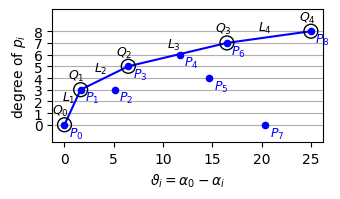

In [ ]:
fig, ax = plt.subplots(figsize=(line_width, 2.1))

#qpmr.plot.delay_distribution_basic(thetas, degrees, mask, ax=ax)
ax.plot(thetas[mask], degrees[mask], color="blue", zorder=10)
ax.scatter(thetas, degrees, marker="o", color="blue", s=20, zorder=50)
ax.scatter(thetas[mask], degrees[mask], marker='o', facecolor='none', edgecolor='black', s=100, zorder=100)

dx, dy = 1.2, -1.0
for i in range(len(thetas)):
    plt.text(thetas[i]+dx, degrees[i]+dy, f'$P_{i}$', fontsize=9, ha='center', color='blue')

dx, dy = -0.4, 0.9
x, y = thetas[mask], degrees[mask]
for i in range(len(x)):
    plt.text(x[i]+dx, y[i]+dy, f'$Q_{i}$', fontsize=9, ha='center', color='black')

dx, dy = -0.35, 0.55
for i in range(len(x)-1):
    xx, yy = (x[i] + x[i+1]) / 2, (y[i] + y[i+1]) / 2
    plt.text(xx+dx, yy+dy, f'$L_{i+1}$', fontsize=9, ha='center', color='black')

ax.set_ylim((-1.5, 9.9))

ax.set_yticks([i for i in range(9)])
ax.yaxis.grid(True)
ax.set_xlabel(r"$\vartheta_i = \alpha_{0} - \alpha_i $")
ax.set_ylabel(r"degree of $p_i$")
plt.tight_layout()

In [44]:
fig.savefig("qpmr_ddd_01.pdf", bbox_inches='tight')

(-3.0, 2.5)

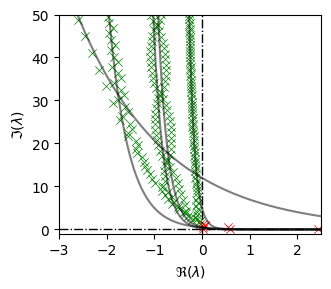

In [45]:
fig, ax = plt.subplots(figsize=(line_width, 3))
qpmr.plot.chain_asymptotes(mi, abs_wk, region, ax=ax)
qpmr.plot.roots_basic(roots, ax=ax)
plt.tight_layout()
ax.set_ylim((-1,50))
ax.set_xlim((-3,None))

In [46]:
fig.savefig("qpmr_roots_01.pdf", bbox_inches='tight')